In [1]:
import sys
sys.path.append('Restricted-Boltzmann-Machine/')
import RBM
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from time import time
from math import ceil

In [2]:
(train_x, train_y), (test_x, test_y) = mnist.load_data()

train_x = train_x.reshape(60000,-1)/255

In [3]:
train_x.shape, train_y.shape

((60000, 784), (60000,))

In [4]:

train_x.dtype, train_x.min(), train_x.max()

(dtype('float64'), 0.0, 1.0)

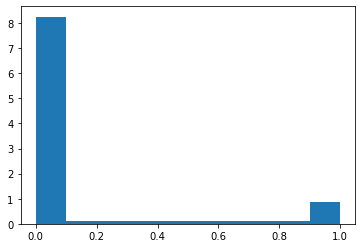

In [6]:
ret= plt.hist(train_x.reshape(-1),density=True)


In [7]:
ret[0]*25.5

array([210.59107239,   3.1001148 ,   2.78720312,   2.37451945,
         2.42122066,   2.81216103,   2.46142219,   2.81195504,
         3.31684311,  22.3234882 ])

In [7]:
ret[1]

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [8]:
ret[2]

<BarContainer object of 10 artists>

In [9]:
ret[0].sum()*255

2550.0

In [8]:
from collections import Counter

In [9]:
_, cnts = np.unique(train_x.reshape(-1),return_counts=True)

In [10]:
("{:,} "*2).format(cnts[0], cnts[100:].sum())

'38,045,844 6,697,502 '

## Create and train an RBM
- number of visible nodes: 728 (size of image)
- number of hidden nodes: 64

In [11]:
rbm = RBM.RBM(n_vis=784, n_hid = 64)


In [12]:


def get_batches(data, batch_size, shuffle=False):
    '''
    Function to provide data in batches.
    input:
        - data: The data to be batched, each sample in one row.
        - batch_size: Size of one batch (last batch might be smaller)
        - shuffle: True if data should be shuffled.
    '''
    if(shuffle):
        np.random.shuffle(data)
    if(batch_size == -1):
        batch_size = len(data)
    num_batches = ceil(data.shape[0]/batch_size)
    for batch_num in range(num_batches):
        yield data[batch_num*batch_size:(batch_num+1)*batch_size]



In [15]:
# Some parameters to set
batch_size = 100
num_epochs = 20
lr = 0.1
burn_in = 0
num_steps = 1

np.random.seed(44)
# Our RBM object
rbm = RBM.RBM(n_vis=28*28, n_hid=12)


# Training loop
errors = []
free_energies_val = []
free_energies_train = []
start_time = time()

# plot_images(rbm, selected_imgs, 
#             title="Reconstructed Images    Epoch: 0",
#             save_as="recon_" + str(0))

for epoch in range(1, num_epochs+1):
    iteration = 0
    error = 0
    for batch in get_batches(train_x, batch_size, shuffle=True):
        iteration += 1
   
        # Compute gradients and errors
        error += rbm.compute_error_and_grads(batch, burn_in=burn_in, num_steps=num_steps)
        
        # Update parameters - use momentum as explained in Hinton's guide
        
        if(epoch > 5):
            rbm.update_params(lr, momentum=0.1)
        else:
            rbm.update_params(lr, momentum=0.3)
        
    #plot_images(rbm, selected_imgs, 
    #        title="Reconstructed Images    Epoch: {}".format(epoch),
    #        save_as="recon_" + str(epoch))
        
    print("epoch:{} \t error:{:.4f} \t training time:{:.2f} s".format(epoch, error, time()-start_time))
    errors.append(error)



epoch:1 	 error:27615.2425 	 training time:5.65 s
epoch:2 	 error:22210.3153 	 training time:11.23 s
epoch:3 	 error:21952.9014 	 training time:16.99 s
epoch:4 	 error:22002.6604 	 training time:22.71 s
epoch:5 	 error:22090.6511 	 training time:28.35 s
epoch:6 	 error:22098.2533 	 training time:33.98 s
epoch:7 	 error:21969.7258 	 training time:39.69 s
epoch:8 	 error:22010.8012 	 training time:45.33 s
epoch:9 	 error:22304.3676 	 training time:51.05 s
epoch:10 	 error:22498.1588 	 training time:56.70 s
epoch:11 	 error:22633.5026 	 training time:62.33 s
epoch:12 	 error:22781.5942 	 training time:67.97 s
epoch:13 	 error:22830.7101 	 training time:73.60 s
epoch:14 	 error:22843.1096 	 training time:79.29 s
epoch:15 	 error:22820.4331 	 training time:85.03 s
epoch:16 	 error:22790.2459 	 training time:90.66 s
epoch:17 	 error:22740.0109 	 training time:96.28 s
epoch:18 	 error:22701.2954 	 training time:101.91 s
epoch:19 	 error:22672.1240 	 training time:107.55 s
epoch:20 	 error:226

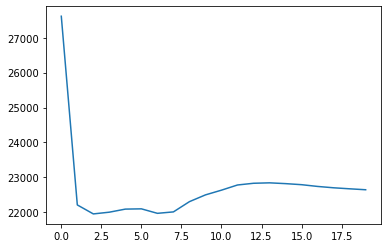

In [16]:
plt.plot(errors)

In [17]:


def plot_weights(rbm, title='weights', save_as="weights"):
    '''
    Plot the weight parameter of the RBM, one for each hidden unit.
    '''
    plt.clf()
    fig, axes = plt.subplots(4, 3, gridspec_kw = {'wspace':0.1, 'hspace':0.1}, figsize=(8, 8))
    fig.suptitle(title)
    for i in range(4):
        for j in range(3):
            axes[i, j].imshow(rbm.W[:,i*3+j].reshape(28, 28), cmap='gray')
            axes[i, j].axis('off')

    plt.savefig(save_as)
    plt.show()
    plt.close()



<Figure size 432x288 with 0 Axes>

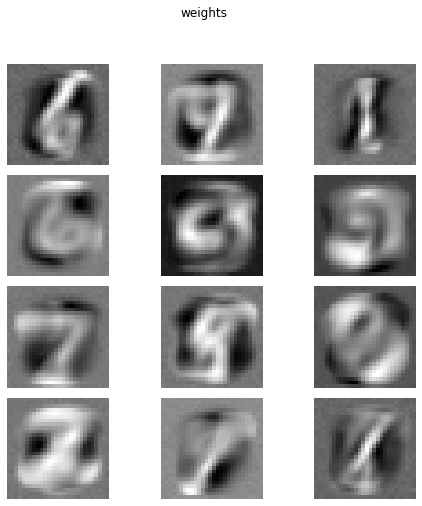

In [18]:
plot_weights(rbm)